In [1]:
#import required libraries to make predictions using upervised learning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans


In [2]:
#load heart_desease.csv file
import pandas as pd

df = pd.read_csv("heart_disease.csv")
df.head()


,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [3]:
#check each column for null values and print the number of null values in each column
print(df.isnull().sum())


Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64


In [4]:
#remove the null values
df.dropna(inplace=True)


In [5]:
#check each column data type
df.dtypes


Age            int64
Sex            int64
ChestPain     object
RestBP         int64
Chol           int64
Fbs            int64
RestECG        int64
MaxHR          int64
ExAng          int64
Oldpeak      float64
Slope          int64
Ca           float64
Thal          object
AHD           object
dtype: object

In [6]:
#change all object data type to int or float
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)
        df[label] = content.astype('category').cat.as_ordered()
        df[label] = pd.Categorical(content).codes+1

df.info()


ChestPain
Thal
AHD
<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 1 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        297 non-null    int64  
 1   Sex        297 non-null    int64  
 2   ChestPain  297 non-null    int8   
 3   RestBP     297 non-null    int64  
 4   Chol       297 non-null    int64  
 5   Fbs        297 non-null    int64  
 6   RestECG    297 non-null    int64  
 7   MaxHR      297 non-null    int64  
 8   ExAng      297 non-null    int64  
 9   Oldpeak    297 non-null    float64
 10  Slope      297 non-null    int64  
 11  Ca         297 non-null    float64
 12  Thal       297 non-null    int8   
 13  AHD        297 non-null    int8   
dtypes: float64(2), int64(9), int8(3)
memory usage: 28.7 KB


In [7]:
#print sample data 
df.head()


,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,4,145,233,1,2,150,0,2.3,3,0.0,1,1
2,67,1,1,160,286,0,2,108,1,1.5,2,3.0,2,2
3,67,1,1,120,229,0,2,129,1,2.6,2,2.0,3,2
4,37,1,2,130,250,0,0,187,0,3.5,3,0.0,2,1
5,41,0,3,130,204,0,2,172,0,1.4,1,0.0,2,1


In [8]:
#check for null values
df.isna().sum()


Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load your data into a pandas DataFrame
data = pd.read_csv("heart_disease.csv")

#check for nan values and remove them
#data.isnull().sum()
data = data.dropna()



# Separate features (x) and target (y)
x = data.iloc[:, :-1]  # All columns except the last one
y = data.iloc[:, -1]   # Last column

# Encode categorical variables using one-hot encoding
x = pd.get_dummies(x, columns=['ChestPain', 'Thal'])  # Replace with your categorical columns

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression()
}

import pickle

# ... (previous code for loading data, preprocessing, training)

# Train and evaluate each model
trained_models = {}
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy:.2f}')
    
    trained_models[model_name] = model  # Save the trained model

# Save the trained models using pickle
for model_name, model in trained_models.items():
    model_filename = f'{model_name.lower().replace(" ", "_")}_model.pickle'
    with open(model_filename, 'wb') as model_file:
        pickle.dump(model, model_file)
    print(f'{model_name} saved as {model_filename}')


Decision Tree Accuracy: 0.80
Random Forest Accuracy: 0.87
SVM Accuracy: 0.63
Logistic Regression Accuracy: 0.90
Decision Tree saved as decision_tree_model.pickle
Random Forest saved as random_forest_model.pickle
SVM saved as svm_model.pickle
Logistic Regression saved as logistic_regression_model.pickle


c:\Users\cheth\.conda\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


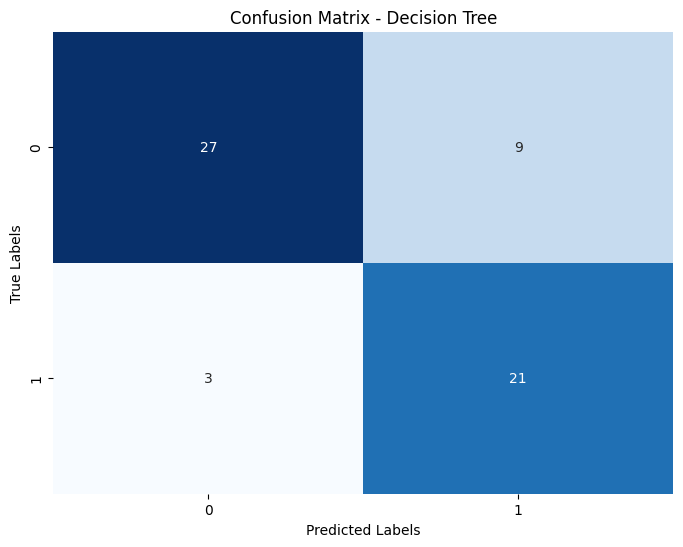

Decision Tree Accuracy: 0.80


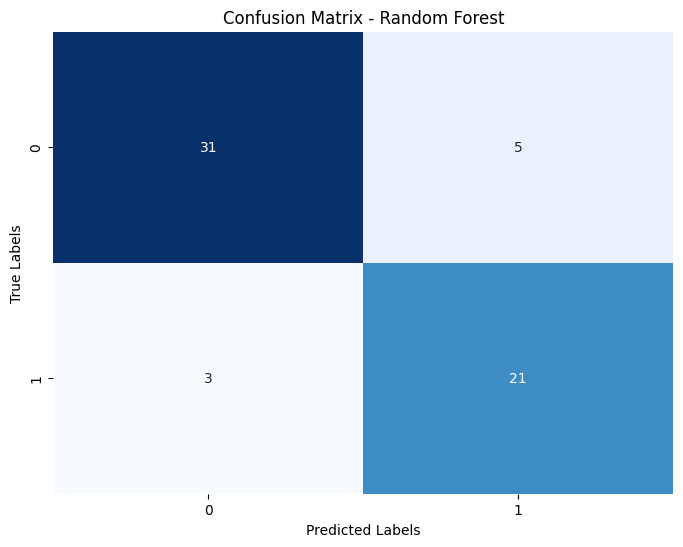

Random Forest Accuracy: 0.87


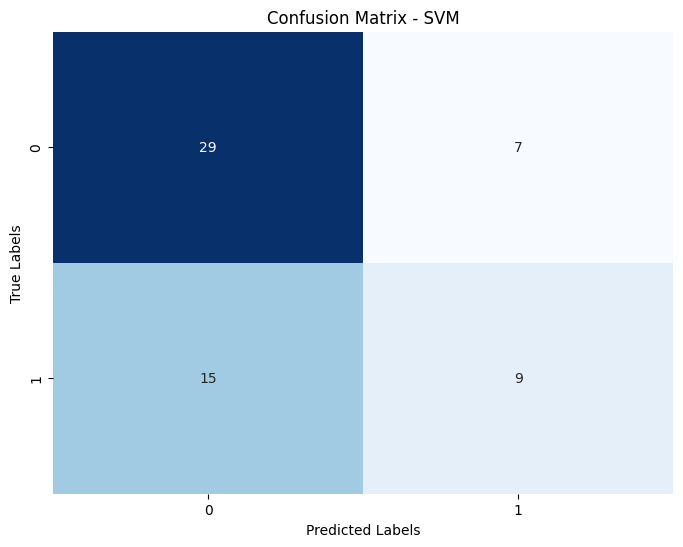

SVM Accuracy: 0.63


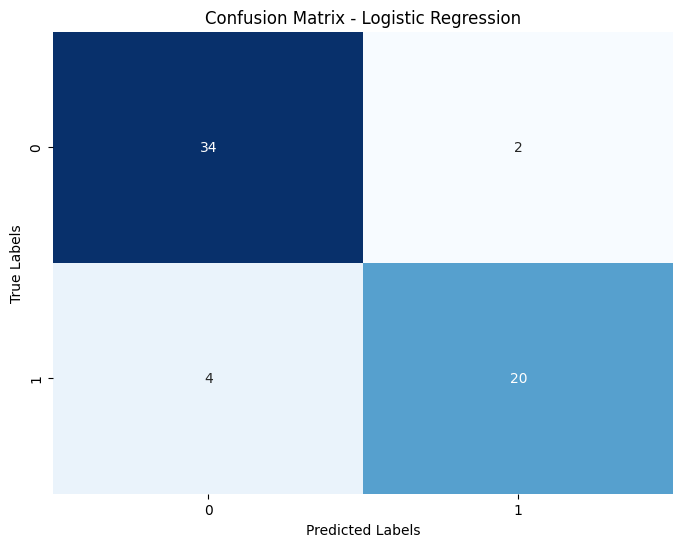

Logistic Regression Accuracy: 0.90


In [17]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# ... (loading and preprocessing the data)

# Load the trained models using pickle
trained_models = {}
for model_name in models.keys():
    model_filename = f'{model_name.lower().replace(" ", "_")}_model.pickle'
    with open(model_filename, 'rb') as model_file:
        model = pickle.load(model_file)
        trained_models[model_name] = model

# Make predictions for each model and plot confusion matrices
for model_name, model in trained_models.items():
    y_pred = model.predict(x_test)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    accuracy = np.sum(np.diag(cm)) / np.sum(cm)
    print(f'{model_name} Accuracy: {accuracy:.2f}')


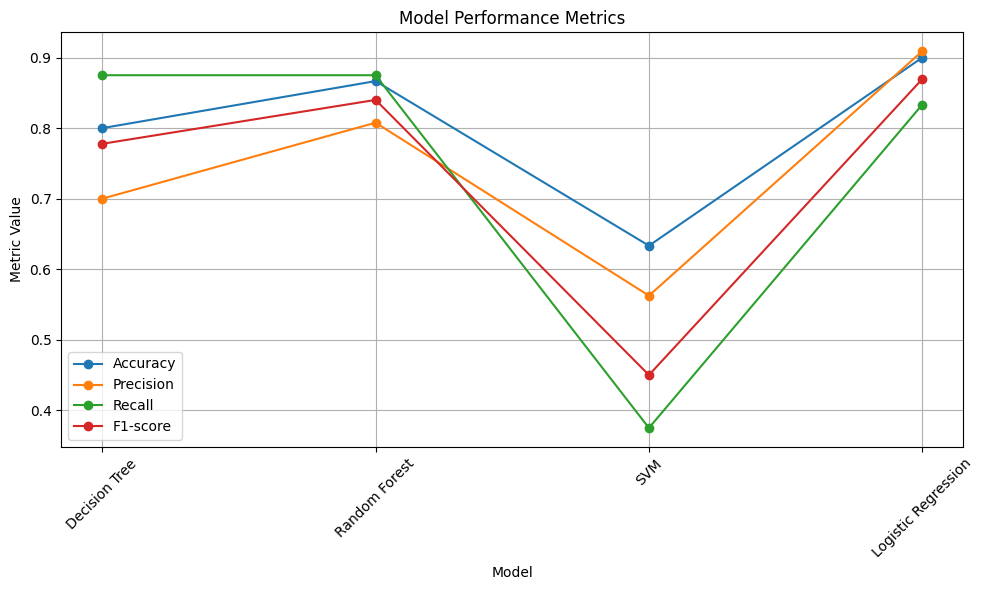

In [19]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support

# ... (loading and preprocessing the data)

# Load the trained models using pickle
trained_models = {}
for model_name in models.keys():
    model_filename = f'{model_name.lower().replace(" ", "_")}_model.pickle'
    with open(model_filename, 'rb') as model_file:
        model = pickle.load(model_file)
        trained_models[model_name] = model

# Initialize lists to store evaluation metrics
model_names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Evaluate each model and collect metrics
for model_name, model in trained_models.items():
    y_pred = model.predict(x_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary', pos_label='Yes')  # Specify positive label
    
    # Append to lists
    model_names.append(model_name)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Plot line graphs
plt.figure(figsize=(10, 6))

plt.plot(model_names, accuracies, marker='o', label='Accuracy')
plt.plot(model_names, precisions, marker='o', label='Precision')
plt.plot(model_names, recalls, marker='o', label='Recall')
plt.plot(model_names, f1_scores, marker='o', label='F1-score')

plt.xlabel('Model')
plt.ylabel('Metric Value')
plt.title('Model Performance Metrics')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


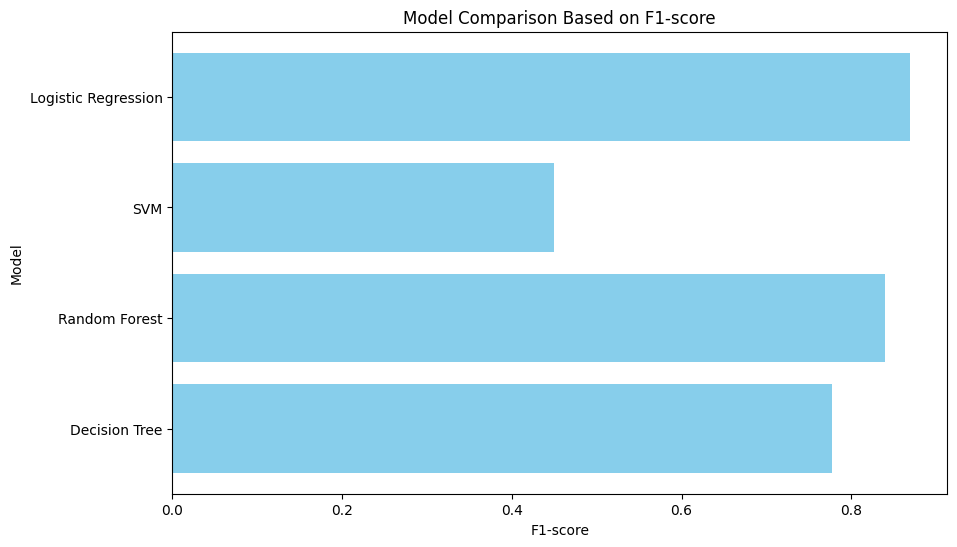

In [23]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# ... (loading and preprocessing the data)

# Load the trained models using pickle
trained_models = {}
for model_name in models.keys():
    model_filename = f'{model_name.lower().replace(" ", "_")}_model.pickle'
    with open(model_filename, 'rb') as model_file:
        model = pickle.load(model_file)
        trained_models[model_name] = model

# Convert categorical target variable to binary
y_test_numeric = np.where(y_test == 'Yes', 1, 0)

# Initialize arrays to store F1-scores
model_names = []
f1_scores = []

# Calculate F1-scores for each model
for model_name, model in trained_models.items():
    y_pred = model.predict(x_test)
    y_pred_numeric = np.where(y_pred == 'Yes', 1, 0)
    
    f1 = f1_score(y_test_numeric, y_pred_numeric)
    
    model_names.append(model_name)
    f1_scores.append(f1)

# Create a bar plot for model comparison
plt.figure(figsize=(10, 6))
plt.barh(model_names, f1_scores, color='skyblue')
plt.xlabel('F1-score')
plt.ylabel('Model')
plt.title('Model Comparison Based on F1-score')
plt.show()
